In [200]:
import numpy as np
import pandas as pd

data = pd.read_csv('Titanic-Dataset.csv')

# Data Analysis

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [202]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [203]:
data.size

10692

In [204]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [205]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [206]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [207]:
data['Age'].fillna(data['Age'].median(), inplace=True)  
data['Cabin'].fillna(data['Cabin'].mode()[0], inplace=True) 
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True) 

C:\Users\PC\AppData\Local\Temp\ipykernel_12832\2707296047.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\PC\AppData\Local\Temp\ipykernel_12832\2707296047.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [208]:
sum(data.isnull().sum())

0

In [209]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [210]:
data = data.drop_duplicates()
print(data.duplicated().sum())

0


In [211]:
from scipy.stats import zscore
import numpy as np

numeric_columns = data.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_columns))
cleaned_dataset = data.copy()

#iterate over each numeric column
for col in numeric_columns.columns:
    median = numeric_columns[col].median()
    outliers = z_scores[col] > 3
    cleaned_dataset.loc[outliers, col] = median

data = cleaned_dataset

In [212]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S


In [213]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Sex']=encoder.fit_transform(data['Sex'])

In [214]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Ticket']=encoder.fit_transform(data['Ticket'])

In [215]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Cabin']=encoder.fit_transform(data['Cabin'])

In [216]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Embarked']=encoder.fit_transform(data['Embarked'])

In [217]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,47,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,81,0


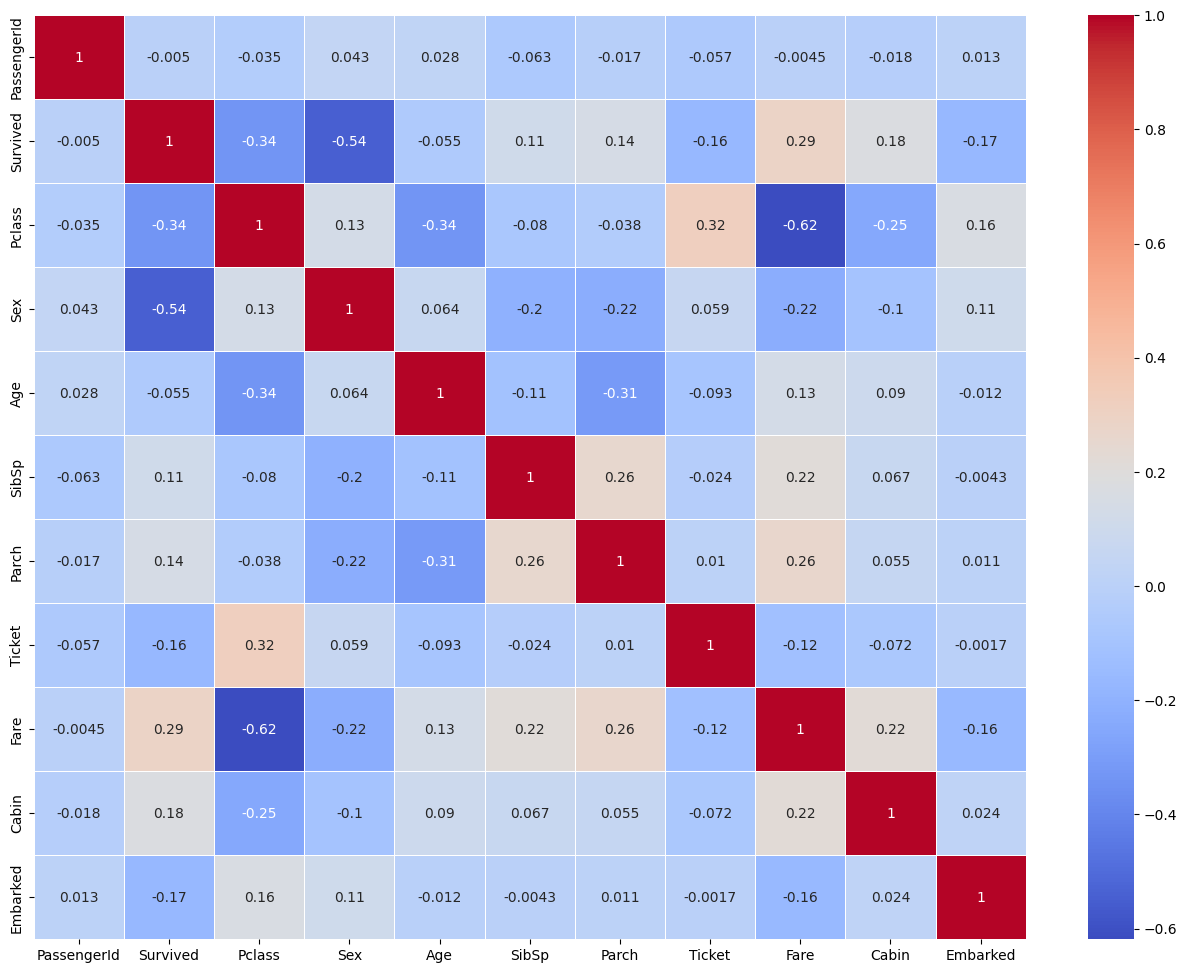

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(16,12))   #initializing an empty figure by specifying its height & width
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)  #heatmap == correlation matrix
plt.show()   #print function of visualizations

In [219]:
data['Survived'].value_counts().to_dict()

{0: 549, 1: 342}

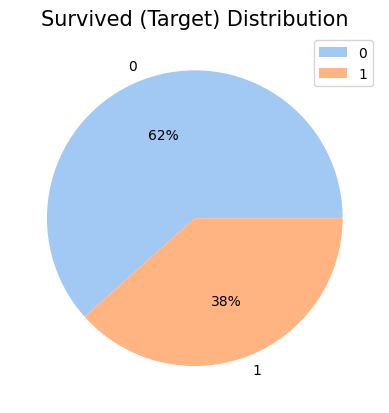

In [220]:
size = data.Survived.value_counts()
labels = data.Survived.value_counts().index
label=[0, 1]
y = np.array(size)

colors = sns.color_palette('pastel')[0:2]
plt.pie(size, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend(label)
plt.title('Survived (Target) Distribution', fontsize=15)
plt.show()

# ML_Classification

In [221]:
# Feature and target selection
data.head(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [222]:
X = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'])
y = data['Survived']

In [223]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [224]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [225]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [226]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [227]:
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

# 1. Histogram-based Gradient Boosting Classification Tree.
hg = HistGradientBoostingClassifier(loss= 'log_loss')
hg.fit(X_train, y_train)
y_pred_hg = hg.predict(X_test)

print("--- HistGradientBoostingClassifier Forest ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_hg))
print("Classification Report:\n", classification_report(y_test, y_pred_hg))
cm = confusion_matrix(y_test, y_pred_hg)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])   
print("Specificity:", specificity)
print("\n")

--- HistGradientBoostingClassifier Forest ---
Confusion Matrix:
 [[93 12]
 [17 57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.77      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

Specificity: 0.8857142857142857




In [228]:
# 2. Extreme Gradient Boosting Classification Tree.
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("--- XGBoost Classifier ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
cm = confusion_matrix(y_test, y_pred_xgb)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print("Specificity:", specificity)
print("\n")

--- XGBoost Classifier ---
Confusion Matrix:
 [[86 19]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82       105
           1       0.75      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179

Specificity: 0.819047619047619




c:\Users\PC\Desktop\Data Science KAIS\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning:

[01:39:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




In [229]:
# 3. Random Forest Classification Tree.
rf = RandomForestClassifier(n_estimators=68, criterion='gini', max_depth=12, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("--- Random Forest Classifier ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print("Specificity:", specificity)
print("\n")

--- Random Forest Classifier ---
Confusion Matrix:
 [[91 14]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179

Specificity: 0.8666666666666667




In [230]:
# 4. Multi-layer Perceptron classifier (MLP)
mlp = MLPClassifier(max_iter=222, activation='relu')
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("--- MLP Classifier ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))
cm = confusion_matrix(y_test, y_pred_mlp)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print("Specificity:", specificity)
print("\n")

--- MLP Classifier ---
Confusion Matrix:
 [[94 11]
 [24 50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179

Specificity: 0.8952380952380953




c:\Users\PC\Desktop\Data Science KAIS\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (222) reached and the optimization hasn't converged yet.



In [231]:
# 5. Logistic Regression
lr = LogisticRegression(C=10, fit_intercept=False)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("--- Logistic Regression ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
cm = confusion_matrix(y_test, y_pred_lr)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print("Specificity:", specificity)
print("\n")

--- Logistic Regression ---
Confusion Matrix:
 [[79 26]
 [11 63]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.75      0.81       105
           1       0.71      0.85      0.77        74

    accuracy                           0.79       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.81      0.79      0.79       179

Specificity: 0.7523809523809524




In [232]:
models = ['Histogram-Boost', 'XGBoost', 'Random Forests', 'Multi-layer Perceptron', 'Logistic Regression']
accuracy_scores = [
    accuracy_score(y_test, y_pred_hg),
    accuracy_score(y_test, y_pred_xgb),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_mlp),
    accuracy_score(y_test, y_pred_lr)
]

f1_scores = [
    f1_score(y_test, y_pred_hg),
    f1_score(y_test, y_pred_xgb),
    f1_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_mlp),
    f1_score(y_test, y_pred_lr)
]

results = pd.DataFrame({
    'Model': models,
    'Accuracy Score': accuracy_scores,
    'F1 Score': f1_scores
})

results.set_index('Model').sort_values(by='Accuracy Score', ascending=False)



#For this Titanic survival prediction project, I would recommend continuing with the Multi-layer Perceptron due 
# to its better F1 score, while keeping in mind that Random Forests remains an excellent option 
# if you prefer a more interpretable and robust model

,Accuracy Score,F1 Score
Model,,
Histogram-Boost,0.837989,0.797203
Random Forests,0.815642,0.769231
Multi-layer Perceptron,0.804469,0.740741
XGBoost,0.793296,0.751678
Logistic Regression,0.793296,0.773006


In [233]:
new_passenger_df = pd.DataFrame([[1, 0, 30, 0, 0, 50.0, 2]], 
                                columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])


new_passenger_scaled = sc.transform(new_passenger_df)
prediction = mlp.predict(new_passenger_scaled)

# Output the prediction result (1 = Survived, 0 = Did not survive)
print("Prediction for the new passenger: ", "Survived" if prediction[0] == 1 else "Did not survive")

Prediction for the new passenger:  Survived


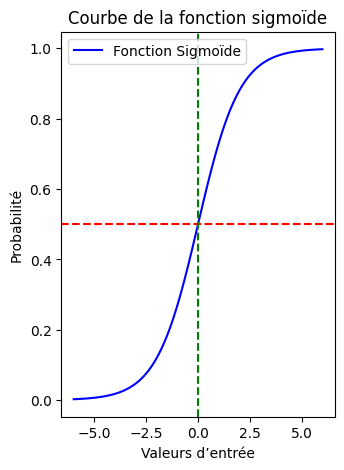

In [234]:
# Visualization of the sigmoid function 
x_values = np.linspace(-6, 6, 100)  
sigmoid = 1 / (1 + np.exp(-x_values))  

plt.figure(figsize=(12, 5))  
plt.subplot(1, 3, 1)  
plt.plot(x_values, sigmoid, label='Fonction Sigmoïde', color='blue')  
plt.title('Courbe de la fonction sigmoïde')  
plt.xlabel('Valeurs d’entrée')  
plt.ylabel('Probabilité')  
plt.axhline(0.5, color='red', linestyle='--')  
plt.axvline(0, color='green', linestyle='--')  
plt.legend() 